In [1]:
# read datasets
import pandas as pd

train_set = pd.read_csv('./data/wage_train_set.csv', skipinitialspace=True)  # remove extra space in string
test_set = pd.read_csv('./data/wage_test_set.csv', skipinitialspace=True)  # remove extra space in string

# add train/test set data identifier field and merge them for preprocess them
train_set['id'] = 0
test_set['id'] = 1

df = pd.concat([train_set, test_set], axis=0)

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [2]:
# replacing '?' with 'unknown' as value
df.replace(' ?', 'unknown', inplace=True)
df.replace('?', 'unknown', inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [3]:
# check target variable
df.wage_class.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [4]:
# rectify string in target variable
df.wage_class.replace('<=50K.', '<=50K', inplace=True)
df.wage_class.replace('>50K.', '>50K', inplace=True)

# add numerical identity to target class
df['wage_class_id'] = df['wage_class'].replace({'<=50K': 0, '>50K': 1})
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id,wage_class_id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


In [5]:
# education variable has several sub-class that can be grouped to make a one sub-class:
def primary_education(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary Education'
    else:
        return x

In [6]:
df['education'] = df['education'].apply(primary_education)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id,wage_class_id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


In [7]:
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [8]:
# native_country variable has many sub-class (country) and this can be group into few sub-class based on their geographical position.
def geography_location(country):
    if country in ['United-States', 'Canada']:
        return 'North America'
    elif country in ['Puerto-Rico', 'El-Salvador', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Guatemala', 'Haiti', 'Nicaragua', 'Trinadad&Tobago', 'Honduras']:
        return 'Central America' 
    elif country in ['Mexico', 'Columbia', 'Vietnam', 'Peru', 'Ecuador', 'South', 'Outlying-US(Guam-USVI-etc)']:
        return 'South America'
    elif country in ['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'Greece', 'Yugoslavia', 'France', 'Ireland', 'Scotland', 'Hungary', 'Holand-Netherlands']:
        return 'European Union'
    elif country in ['India', 'Iran', 'China', 'Japan', 'Thailand', 'Hong', 'Cambodia', 'Laos', 'Philippines', 'Taiwan']:
        return 'Asia'
    else:
        return country

In [9]:
df['native_country'] = df['native_country'].apply(geography_location)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id,wage_class_id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North America,<=50K,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North America,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North America,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North America,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Central America,<=50K,0,0


In [10]:
# feature clipping for outlier variables
df2 = df.copy()

for col in ['fnlwgt']:
    # IQR
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    print(col, lower, upper)
    # feature clipping
    df2[col] = df2[col].clip(lower, upper)

fnlwgt -62586.75 417779.25


In [11]:
# list all the variables
df2.drop(['wage_class'], axis=1, inplace=True)
list(df2.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'id',
 'wage_class_id']

In [12]:
# Splitting the data in to train and test split for model training
train_df = df2[df2['id']==0]
test_df = df2[df2['id']==1]

train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

print(train_df.shape)
print(test_df.shape)

(32561, 15)
(16281, 15)


In [13]:
# segregate numerical and categorical columns
numerical_columns = train_df.columns[train_df.dtypes!='object']
categorical_columns = train_df.columns[train_df.dtypes=='object']
print("Numerical columns:", list(numerical_columns))
print('Categorical Columns:', list(categorical_columns))

Numerical columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class_id']
Categorical Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [14]:
# verify no. of category for each ordinal variable
for col in categorical_columns:
    subcat = train_df[col].unique().tolist()
    print(col, subcat)

workclass ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'unknown', 'Self-emp-inc', 'Without-pay', 'Never-worked']
education ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
marital_status ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'unknown', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex ['Male', 'Female']
native_country ['North America', 'Central America', 'Asia', 'unkn

In [15]:
# Define the custom ranking for each ordinal variable
workclass_categories = ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'unknown', 'Self-emp-inc', 'Without-pay', 'Never-worked']
education_categories = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
marital_status_categories = ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation_categories = ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'unknown', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship_categories = ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race_categories = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex_categories = ['Male', 'Female']
native_country_categories = ['North America', 'Central America', 'Asia', 'unknown', 'South America', 'European Union']

In [16]:
x_train, y_train = train_df.drop(['wage_class_id'], axis=1), train_df['wage_class_id']
x_test, y_test = test_df.drop(['wage_class_id'], axis=1), test_df['wage_class_id']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32561, 14) (32561,)
(16281, 14) (16281,)


In [17]:
# apply min-max scaler normalization
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[workclass_categories, education_categories, marital_status_categories, 
                                                      occupation_categories, relationship_categories, race_categories, sex_categories, native_country_categories])),
        ('scaler', MinMaxScaler())
    ]
)

# preprocessor
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

x_train_norm = preprocessor.fit_transform(x_train)
x_test_norm = preprocessor.transform(x_test)

In [18]:
# check imbalance in the training data
y_0 = y_train[y_train == 0]
y_1 = y_train[y_train == 1]
print(len(y_0), len(y_1))

24720 7841


In [59]:
### dataset is imbalanced because class 0 is about 3 time of class 1

# up sampling to balance the dataset
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train2, y_train2 = ros.fit_resample(x_train, y_train)

# check data counts now
y_0 = y_train2[y_train2 == 0]
y_1 = y_train2[y_train2 == 1]
print(len(y_0), len(y_1))

24720 24720


In [60]:
# apply preprocessor
x_train2 = pd.DataFrame(preprocessor.fit_transform(x_train2), columns=preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test), columns=preprocessor.get_feature_names_out())

In [61]:
x_train2.head()

,num_pipeline__age,num_pipeline__fnlwgt,num_pipeline__education_num,num_pipeline__capital_gain,num_pipeline__capital_loss,num_pipeline__hours_per_week,cat_pipeline__workclass,cat_pipeline__education,cat_pipeline__marital_status,cat_pipeline__occupation,cat_pipeline__relationship,cat_pipeline__race,cat_pipeline__sex,cat_pipeline__native_country
0,0.301370,0.160868,0.800000,0.02174,0.0,0.397959,0.000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0
1,0.452055,0.175159,0.800000,0.00000,0.0,0.122449,0.125,0.000000,0.166667,0.071429,0.2,0.00,0.0,0.0
2,0.287671,0.501514,0.533333,0.00000,0.0,0.397959,0.250,0.066667,0.333333,0.142857,0.0,0.00,0.0,0.0
3,0.493151,0.548555,0.400000,0.00000,0.0,0.397959,0.250,0.133333,0.166667,0.142857,0.2,0.25,0.0,0.0
4,0.150685,0.804263,0.800000,0.00000,0.0,0.397959,0.250,0.000000,0.166667,0.214286,0.4,0.25,1.0,0.2


In [62]:
x_test.head()

,num_pipeline__age,num_pipeline__fnlwgt,num_pipeline__education_num,num_pipeline__capital_gain,num_pipeline__capital_loss,num_pipeline__hours_per_week,cat_pipeline__workclass,cat_pipeline__education,cat_pipeline__marital_status,cat_pipeline__occupation,cat_pipeline__relationship,cat_pipeline__race,cat_pipeline__sex,cat_pipeline__native_country
0,0.109589,0.529026,0.400000,0.000000,0.0,0.397959,0.250,0.133333,0.000000,0.642857,0.6,0.25,0.0,0.0
1,0.287671,0.191196,0.533333,0.000000,0.0,0.500000,0.250,0.066667,0.166667,0.571429,0.2,0.00,0.0,0.0
2,0.150685,0.800667,0.733333,0.000000,0.0,0.397959,0.500,0.400000,0.166667,0.857143,0.2,0.00,0.0,0.0
3,0.369863,0.365080,0.600000,0.076881,0.0,0.397959,0.250,0.333333,0.166667,0.642857,0.2,0.25,0.0,0.0
4,0.013699,0.224940,0.600000,0.000000,0.0,0.295918,0.625,0.333333,0.000000,0.785714,0.6,0.00,1.0,0.0


In [63]:
# ! pip install xgboost

     ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
     --------------------------------------- 0.0/99.7 MB 991.0 kB/s eta 0:01:41
     ---------------------------------------- 0.2/99.7 MB 1.6 MB/s eta 0:01:01
     ---------------------------------------- 0.3/99.7 MB 2.3 MB/s eta 0:00:45
     ---------------------------------------- 0.5/99.7 MB 2.9 MB/s eta 0:00:35
     ---------------------------------------- 0.8/99.7 MB 3.2 MB/s eta 0:00:31
     ---------------------------------------- 1.0/99.7 MB 3.5 MB/s eta 0:00:29
      --------------------------------------- 1.3/99.7 MB 4.2 MB/s eta 0:00:24
      --------------------------------------- 1.6/99.7 MB 4.2 MB/s eta 0:00:24
      --------------------------------------- 1.8/99.7 MB 4.2 MB/s eta 0:00:24
      --------------------------------------- 2.0/99.7 MB 4.3 MB/s eta 0:00:23
      --------------------------------------- 2.0/99.7 MB 4.3 MB/s eta 0:00:23
      --------------------------------------- 2.0/99.7 MB 

In [64]:
## Model training
from xgboost import XGBClassifier

# instantiate a decision tree classifier model and fit with X_train2 and y_train2 data
model = XGBClassifier()
model.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
# Evaluate model
from sklearn.metrics import accuracy_score

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train2)

print("train set accuracy score: ", accuracy_score(y_train2, y_pred_train))
print("test set accuracy score :",  accuracy_score(y_test, y_pred_test))

train set accuracy score:  0.8947613268608414
test set accuracy score : 0.8413488114980652


In [81]:
# Perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = [{ 'learning_rate':[0.01, 0.001],
           'max_depth': [30, 35, 40],
           'n_estimators':[400, 450, 500]
           }
           ]

# initializing grid-search-cv
clf = XGBClassifier()
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
clf_grid.fit(x_train2, y_train2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.001],
                          'max_depth': [30, 35, 40],
                          'n_estimators': [400, 450, 500]}],
             scoring='accuracy', verbose=3)

In [82]:
# best score and parameter for the model
print(clf_grid.best_score_)
print(clf_grid.best_params_)

0.931957928802589
{'learning_rate': 0.01, 'max_depth': 40, 'n_estimators': 500}


In [83]:
# Applying best params on XGBoost
best_params = {'learning_rate': 0.01, 'max_depth': 40, 'n_estimators': 500}
model2 = XGBClassifier(**best_params)
model2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=40, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
print('train score = ', model2.score(x_train2, y_train2))
print('test score = ', model2.score(x_test, y_test))

train score =  0.9956917475728155
test score =  0.8471838339168356


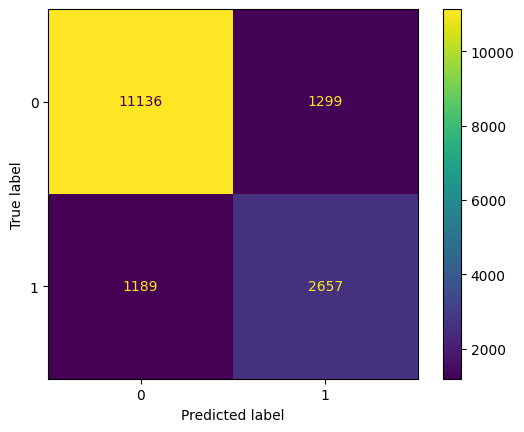

In [85]:
# plot_confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = model2.predict(x_test)

labels = list(np.unique(y_test))
cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [86]:
# print accuracy results
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
f1_score = 2*precision*recall/(precision+recall)

print("accuracy = ", round(accuracy, 2))
print("recall = ", round(recall, 2))
print("precision = ", round(precision, 2))
print("F1_score = ", round(f1_score, 2))

accuracy =  0.85
recall =  0.9
precision =  0.9
F1_score =  0.9


In [87]:
# classification report
# Finding Precision, Recall, F1- Score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.90      0.90      0.90     12435
        >50K       0.67      0.69      0.68      3846

    accuracy                           0.85     16281
   macro avg       0.79      0.79      0.79     16281
weighted avg       0.85      0.85      0.85     16281



AUC = 0.7931922126100966


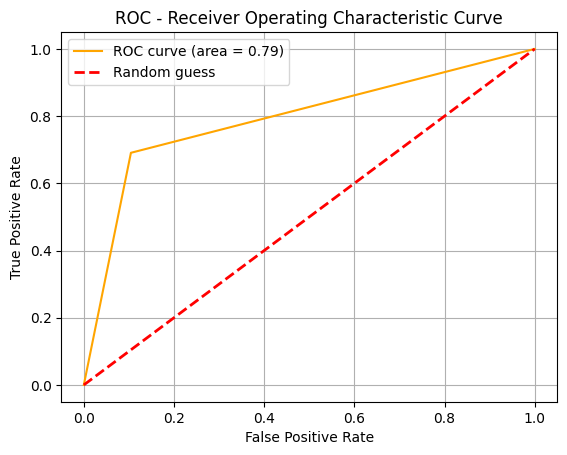

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating area under curve
# The  AUC represents the area under the ROC curve
auc = roc_auc_score(y_test, y_pred_test)
print(f'AUC = {auc}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)

# plot
plt.plot(false_positive_rate, true_positive_rate, color='orange', label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver Operating Characteristic Curve')
plt.grid()
plt.legend()
plt.show()

In [89]:
from sklearn.model_selection import cross_val_score
prediction = cross_val_score(model2, x_train2, y_train2, cv=10)
prediction

array([0.91788026, 0.9269822 , 0.92900485, 0.93487055, 0.93851133,
       0.9421521 , 0.94761327, 0.94093851, 0.947411  , 0.94194984])

In [91]:
import numpy as np
np.mean(prediction)

0.9367313915857605

In [32]:
# create model for imbalance dataset
# https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from collections import Counter

# count examples in each class
counter = Counter(y_train)

# estimate scale_pos_weight value
estimate = counter[1] / counter[0]
print('Estimate: %.3f' % estimate)

Estimate: 0.317


In [33]:
from sklearn.model_selection import GridSearchCV

# now apply class-weight to train xgboost model
x_train3 = pd.DataFrame(preprocessor.fit_transform(x_train), columns=preprocessor.get_feature_names_out())

# define model
# model = XGBClassifier(scale_pos_weight=estimate)
model = XGBClassifier()

# define grid
weights = [0.1, 0.2, 0.3, 0.317, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 3, 5]
param_grid = dict(scale_pos_weight=weights)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(x_train3, y_train)

# evaluate model
# scores = cross_val_score(model, x_train3, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
# print('Mean ROC AUC: %.5f' % mean(scores))

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.927071 using {'scale_pos_weight': 0.2}
0.926566 (0.005194) with: {'scale_pos_weight': 0.1}
0.927071 (0.005303) with: {'scale_pos_weight': 0.2}
0.926770 (0.005197) with: {'scale_pos_weight': 0.3}
0.926654 (0.005492) with: {'scale_pos_weight': 0.317}
0.926784 (0.005350) with: {'scale_pos_weight': 0.4}
0.926635 (0.005049) with: {'scale_pos_weight': 0.5}
0.926651 (0.005241) with: {'scale_pos_weight': 0.6}
0.927066 (0.005434) with: {'scale_pos_weight': 0.7}
0.926875 (0.005271) with: {'scale_pos_weight': 0.8}
0.926650 (0.005431) with: {'scale_pos_weight': 0.9}
0.926660 (0.005368) with: {'scale_pos_weight': 1}
0.926511 (0.005176) with: {'scale_pos_weight': 3}
0.925375 (0.005540) with: {'scale_pos_weight': 5}


In [40]:
# Final model
model = XGBClassifier(learning_rate=0.01, max_depth=40, n_estimators=500)
model.fit(x_train3, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=40, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

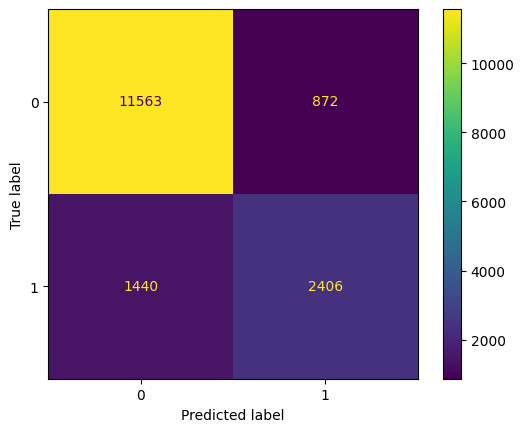

In [41]:
# plot_confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# x_test = pd.DataFrame(preprocessor.transform(x_test), columns=preprocessor.get_feature_names_out())

y_pred_test = model.predict(x_test)

labels = list(np.unique(y_test))
cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [42]:
from sklearn.model_selection import cross_val_score
prediction = cross_val_score(model, x_train3, y_train, cv=10)
prediction

array([0.85293215, 0.85595823, 0.86302211, 0.85288698, 0.86302211,
       0.86425061, 0.85872236, 0.86056511, 0.86916462, 0.85380835])